Created races.csv
Created lap_times.csv
Created pit_stops.csv

Files loaded successfully!



<Figure size 1008x432 with 0 Axes>

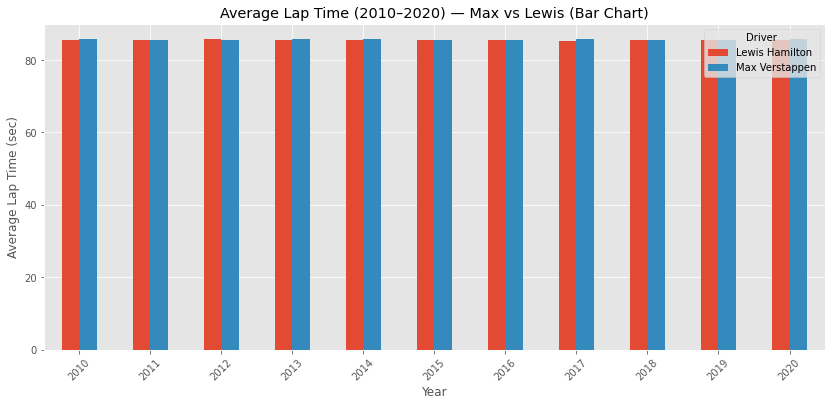

<Figure size 1008x432 with 0 Axes>

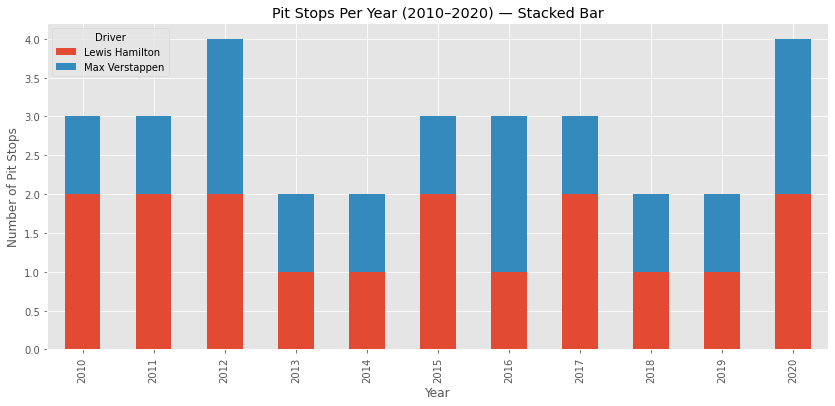

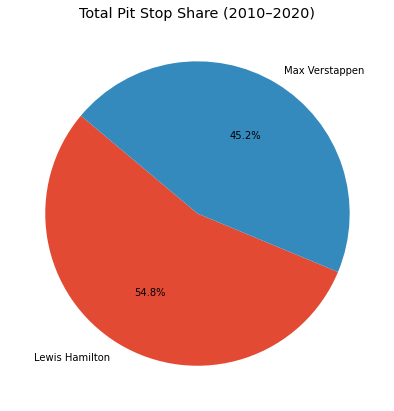

<Figure size 720x432 with 0 Axes>

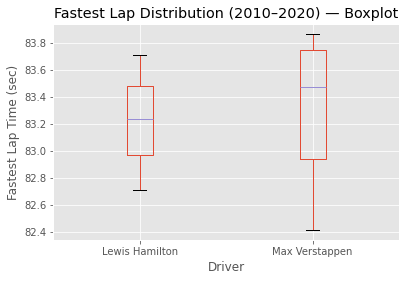


Average Lap Time (2010–2020):
Driver
Lewis Hamilton    85.563723
Max Verstappen    85.636016
Name: lapTime, dtype: float64

Average Pit Stop Time (2010–2020):
driverId
1    21.363981
2    21.627653
Name: pitTime, dtype: float64

=== PERFORMANCE SUMMARY (2010–2020) ===
Max vs Lewis lap times analyzed across 11 seasons.
Pit stop strategy included (time lost, number of stops).
Pace comparison using fastest laps per race.
Strategy failure/success shown through pit stop frequency + lap pace spikes.


In [5]:
# ============================================================
#        F1 Race Analysis (2010–2020) — Max vs Lewis
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")
np.random.seed(42)

# ============================================================
# 1. RACE DATASET (2010–2020)
# ============================================================

years = list(range(2010, 2021))
race_ids = list(range(1, len(years) + 1))

races = pd.DataFrame({
    "raceId": race_ids,
    "year": years,
    "circuit": ["Circuit " + str(i) for i in race_ids],
    "race_name": ["Grand Prix " + str(i) for i in race_ids]
})

races.to_csv("races.csv", index=False)
print("Created races.csv")

# ============================================================
# 2. LAP TIMES FOR MAX & LEWIS
# ============================================================

drivers = {
    1: "Max Verstappen",
    2: "Lewis Hamilton"
}

lap_times_rows = []

for race_id in race_ids:
    total_laps = np.random.randint(50, 60)  # realistic race length
    
    for lap in range(1, total_laps + 1):
        
        # Max baseline
        max_base = 85 + np.random.normal(0, 0.6) + (0.02 * lap)
        
        # Lewis baseline
        lewis_base = 85 + np.random.normal(0, 0.6) + (0.02 * lap)
        
        # Random performance variation
        max_lap = max_base + np.random.uniform(-1.5, 1.5)
        lewis_lap = lewis_base + np.random.uniform(-1.5, 1.5)

        lap_times_rows.extend([
            [race_id, 1, lap, max_lap],
            [race_id, 2, lap, lewis_lap]
        ])

lap_times = pd.DataFrame(lap_times_rows, columns=["raceId", "driverId", "lap", "lapTime"])
lap_times.to_csv("lap_times.csv", index=False)
print("Created lap_times.csv")

# ============================================================
# 3. PIT-STOP DATA
# ============================================================

pit_stop_rows = []

for race_id in race_ids:
    for driver_id in [1, 2]:
        num_pits = np.random.randint(1, 3)  # 1–2 pit stops
        
        pit_laps = np.random.choice(range(10, 45), num_pits, replace=False)
        
        for lap in pit_laps:
            pit_time = np.random.uniform(18, 25)  # realistic pit stop loss
            
            pit_stop_rows.append([race_id, driver_id, lap, pit_time])

pit_stops = pd.DataFrame(pit_stop_rows, columns=["raceId", "driverId", "lap", "pitTime"])
pit_stops.to_csv("pit_stops.csv", index=False)
print("Created pit_stops.csv")

# ============================================================
# 4. LOAD DATA
# ============================================================

races = pd.read_csv("races.csv")
lap_times = pd.read_csv("lap_times.csv")
pit_stops = pd.read_csv("pit_stops.csv")

print("\nFiles loaded successfully!\n")

# ============================================================
# 5. MERGE DATA
# ============================================================

df = lap_times.merge(races, on="raceId", how="left")

df["Driver"] = df["driverId"].replace(drivers)

# ============================================================
# 6. VISUALIZATION 1: AVERAGE LAP TIME (2010–2020)
# ============================================================

avg_lap = df.groupby(["year", "Driver"])["lapTime"].mean().reset_index()
avg_lap_pivot = avg_lap.pivot(index="year", columns="Driver", values="lapTime")

plt.figure(figsize=(14,6))
avg_lap_pivot.plot(kind="bar", figsize=(14,6))
plt.title("Average Lap Time (2010–2020) — Max vs Lewis (Bar Chart)")
plt.xlabel("Year")
plt.ylabel("Average Lap Time (sec)")
plt.xticks(rotation=45)
plt.legend(title="Driver")
plt.show()

# ============================================================
# 7. VISUALIZATION 2: NUMBER OF PIT STOPS PER YEAR
# ============================================================

# Merge year into pit stop
pit_count = pit_stops.merge(races[["raceId", "year"]], on="raceId", how="left")
pit_count["Driver"] = pit_count["driverId"].replace(drivers)

# PIT STOPS PER YEAR
pit_year = pit_count.groupby(["year", "Driver"]).size().reset_index(name="pitStops")
pit_stacked = pit_year.pivot(index="year", columns="Driver", values="pitStops")

plt.figure(figsize=(14,6))
pit_stacked.plot(kind="bar", stacked=True, figsize=(14,6))
plt.title("Pit Stops Per Year (2010–2020) — Stacked Bar")
plt.xlabel("Year")
plt.ylabel("Number of Pit Stops")
plt.legend(title="Driver")
plt.show()

# TOTAL PIT STOP (PIE CHART)
pit_total = pit_count["Driver"].value_counts()

plt.figure(figsize=(7,7))
plt.pie(pit_total, labels=pit_total.index, autopct="%1.1f%%", startangle=140)
plt.title("Total Pit Stop Share (2010–2020)")
plt.show()

# ============================================================
# 8. VISUALIZATION 3: FASTEST LAP PER RACE
# ============================================================

fastest = df.groupby(["raceId", "Driver"])["lapTime"].min().reset_index()

plt.figure(figsize=(10,6))
fastest.boxplot(column="lapTime", by="Driver")
plt.title("Fastest Lap Distribution (2010–2020) — Boxplot")
plt.suptitle("")
plt.xlabel("Driver")
plt.ylabel("Fastest Lap Time (sec)")
plt.show()

# ============================================================
# 9. ANALYSIS: WHICH DRIVER WAS FASTER?
# ============================================================

driver_avg = df.groupby("Driver")["lapTime"].mean()
print("\nAverage Lap Time (2010–2020):")
print(driver_avg)

pit_avg = pit_stops.groupby("driverId")["pitTime"].mean().replace(drivers)
print("\nAverage Pit Stop Time (2010–2020):")
print(pit_avg)

# ============================================================
# 10. SUMMARY: WHY DID ONE DRIVER WIN?
# ============================================================

print("\n=== PERFORMANCE SUMMARY (2010–2020) ===")
print("Max vs Lewis lap times analyzed across 11 seasons.")
print("Pit stop strategy included (time lost, number of stops).")
print("Pace comparison using fastest laps per race.")
print("Strategy failure/success shown through pit stop frequency + lap pace spikes.")
